# Data Preparation

## Load data from sqlite3 in json

In [1]:
from utils.db.get_data_db import get_data_json, get_d_options
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
sns.set()

import warnings
warnings.filterwarnings('ignore')

db_file_path = 'data/study_01.db'
data = get_data_json(db_file_path)

# dict: {<d_id>, List of available options per demo question}
d_options = get_d_options(db_file_path)
#data

## Data cleaning 

In [2]:
data_processed = {}
for p in data:
    #keep only full registrations
    if data[p]['status'] == "end_thanks":
        data_processed[p] = data[p]

## Get Answers to Demographic Questions

D1: What is your age?

D2: What gender do you identify with?

D3: What is the highest level of education you have completed?

D4: What former training in statistics have you undertaken?

D5: Could you confidently state the Bayes Rule?

In [3]:
# demographic questions ids
d_ids = ['d1','d2','d3','d4','d5']

# get demo answers for interactive participants
demo_answers = {}
for d in d_ids:
    answ = [p_details['d_answers'][d]['option'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 'i' ]
    demo_answers[d] = answ
demo_answers['condition'] = ['IG']*len(demo_answers[d])

# get demo answers for static participants    
count_answ_s = 0
for d in d_ids:
    answ = [p_details['d_answers'][d]['option'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 's' ]
    demo_answers[d].extend(answ)
demo_answers['condition'].extend(
    ['SG']*(len(demo_answers[d])-len(demo_answers['condition'])))

df = pd.DataFrame(demo_answers)

# add line breaks to long answer options
df['d3'] = df['d3'].replace(['A-levels or equivalent'],'A-levels \n or equivalent')
df['d4'] = df['d4'].replace(['Postgraduate degree in Statistics',"University degree in Statistics"],['Postgrad. degree\n in Statistics','Univ. degree\n in Statistics'])

# Visualize Demographics

[Text(0.5, 0, '')]

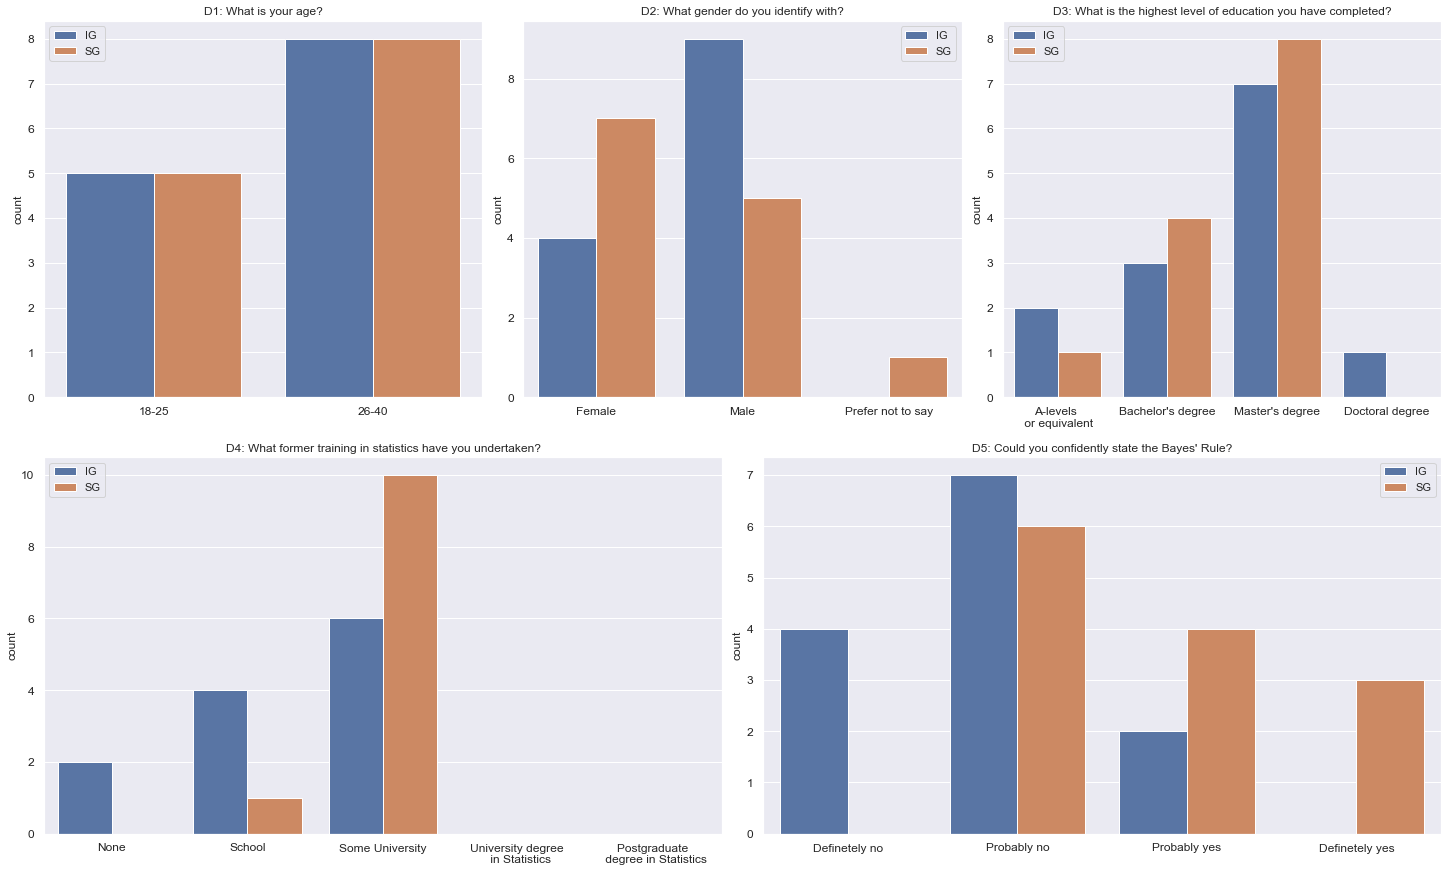

In [4]:
## Plot in common figure
fig = plt.figure(constrained_layout=True,figsize=(20, 12))
gs = GridSpec(2, 6, figure=fig)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:6])
ax4 = fig.add_subplot(gs[1, 0:3])
ax5 = fig.add_subplot(gs[1, 3:6])

g1 = sns.countplot(ax=ax1, x = 'd1', hue = 'condition', data = df, 
              order = ['18-25','26-40'])
g1.legend_.set_title(None)
ax1.set_title("D1: What is your age?",fontsize="large")
ax1.tick_params(axis='both', labelsize="large")
ax1.yaxis.label.set_size('large')

g2 = sns.countplot(ax=ax2, x = 'd2', hue = 'condition', data = df)
g2.legend_.set_title(None)
ax2.set_title("D2: What gender do you identify with?", fontsize="large")
ax2.tick_params(axis='both', labelsize="large")
ax2.yaxis.label.set_size('large')

g3 = sns.countplot(ax=ax3, x = 'd3', hue = 'condition', data = df, 
              order = ['A-levels \n or equivalent',"Bachelor's degree",
                       "Master's degree","Doctoral degree"])
g3.legend_.set_title(None)
ax3.set_title("D3: What is the highest level of education you have completed?", 
              fontsize="large")
ax3.tick_params(axis='both', labelsize="large")
ax3.yaxis.label.set_size('large')

g4 = sns.countplot(ax=ax4, x = 'd4', hue = 'condition', data = df, 
              order = ['None','School','Some University','University degree \n in Statistics',
                       'Postgraduate \n degree in Statistics'])
g4.legend_.set_title(None)
ax4.set_title("D4: What former training in statistics have you undertaken?", 
              fontsize="large")
ax4.tick_params(axis='both', labelsize="large")
ax4.yaxis.label.set_size('large')

g5 = sns.countplot(ax=ax5, x = 'd5', hue = 'condition', data = df)
g5.legend_.set_title(None)
ax5.set_title("D5: Could you confidently state the Bayes' Rule?", 
              fontsize="large")
ax5.tick_params(axis='both', labelsize="large")
ax5.yaxis.label.set_size('large')

plt.rcParams['legend.fontsize'] = 16
plt.rcParams['legend.title_fontsize'] = 16
ax1.set(xlabel=None)
ax2.set(xlabel=None)
ax3.set(xlabel=None)
ax4.set(xlabel=None)
ax5.set(xlabel=None)

# plt.savefig('Figure4.pdf',dpi=300)

# Visualize Demographics as independent plots

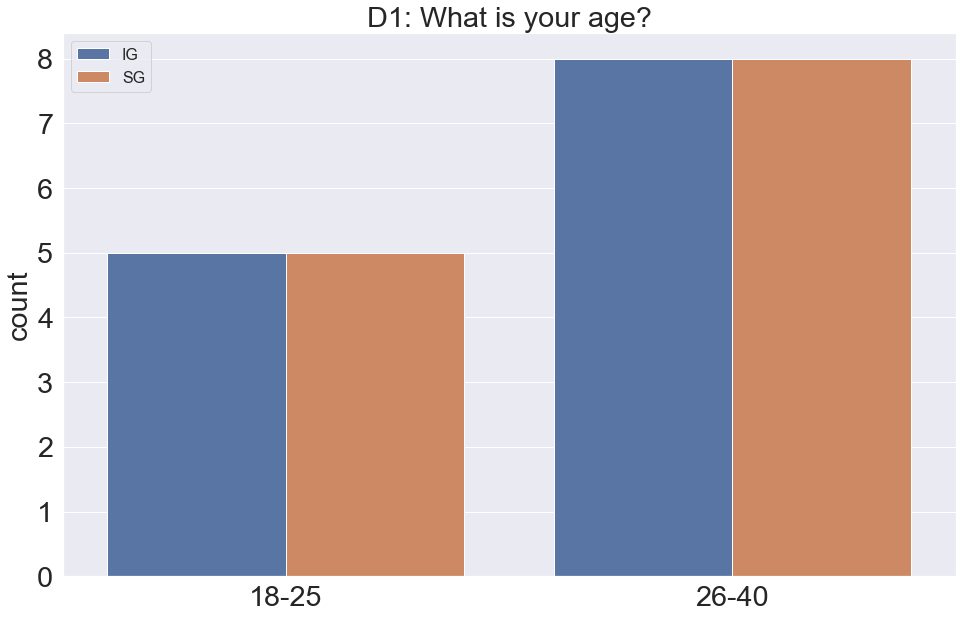

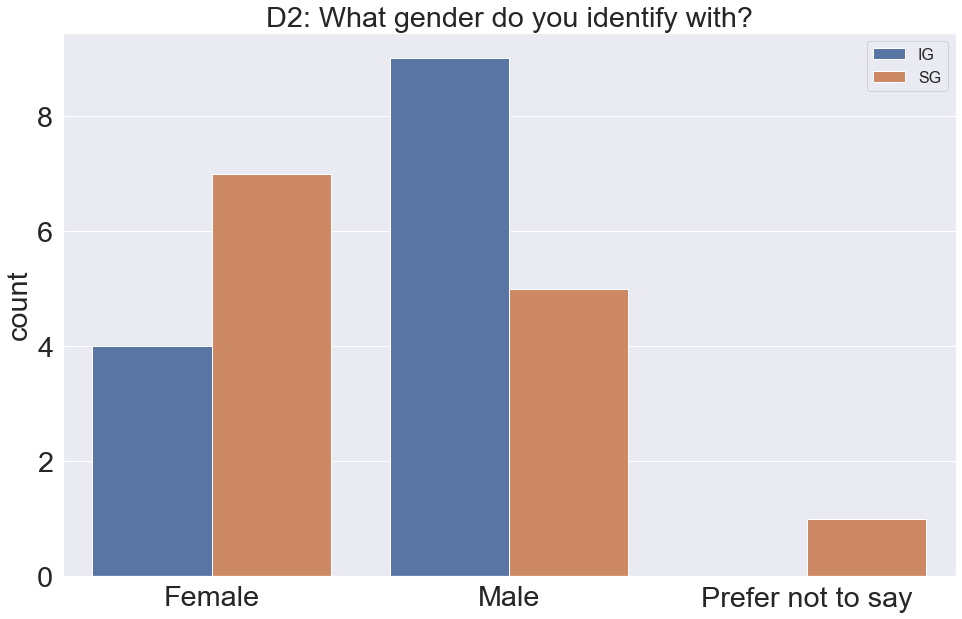

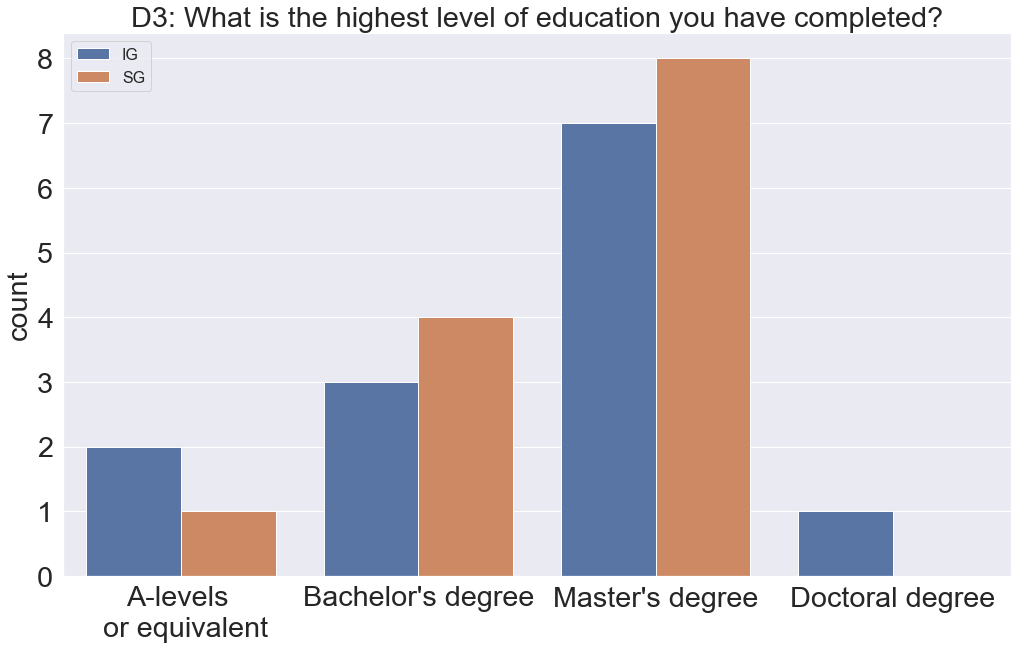

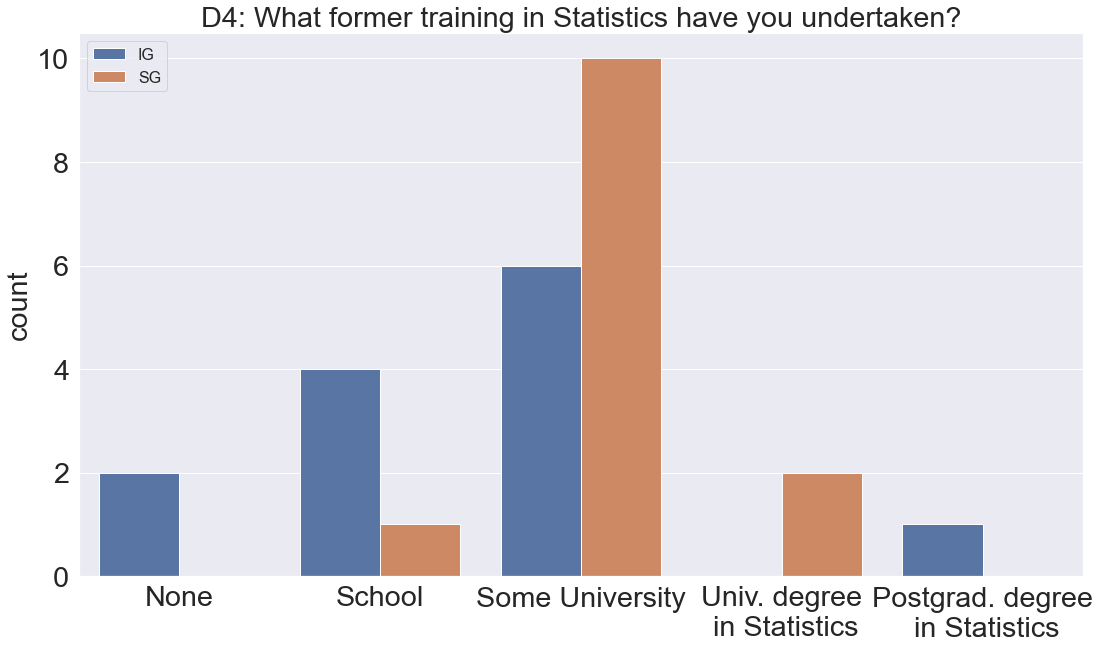

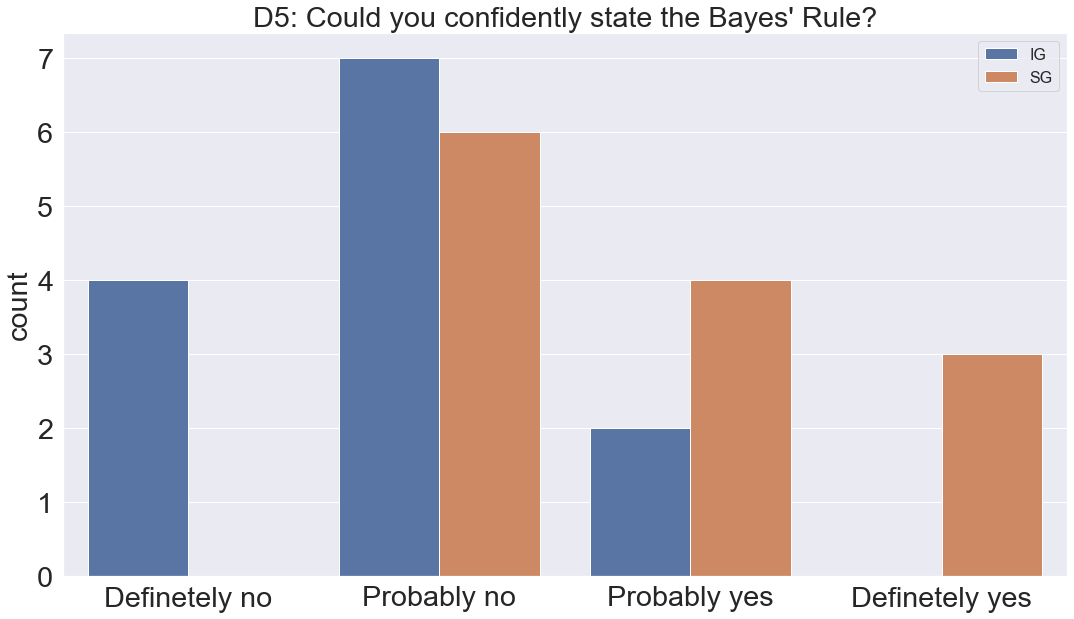

In [12]:
plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 24})
## Plot in separate figures
## Age
g1 = sns.countplot(x = 'd1', hue = 'condition', data = df, 
              order = ['18-25','26-40'])
g1.legend_.set_title(None)
ax1 = g1.axes
ax1.set_title("D1: What is your age?",fontsize="large")
ax1.tick_params(axis='both', labelsize="large")
ax1.yaxis.label.set_size('large')
ax1.set(xlabel=None)
fig1 = g1.get_figure()
fig1.savefig('Figure4a.svg',dpi=300) 

plt.figure(figsize=(16,10))
## Gender
g2 = sns.countplot(x = 'd2', hue = 'condition', data = df)
g2.legend_.set_title(None)
ax2 = g2.axes
ax2.set_title("D2: What gender do you identify with?", fontsize="large")
ax2.tick_params(axis='both', labelsize="large")
ax2.yaxis.label.set_size('large')
ax2.set(xlabel=None)
fig2 = g2.get_figure()
fig2.savefig('Figure4b.svg',dpi=300) 

plt.figure(figsize=(17,10))
## Level of Education
g3 = sns.countplot(x = 'd3', hue = 'condition', data = df, 
              order = ['A-levels \n or equivalent',"Bachelor's degree",
                       "Master's degree","Doctoral degree"])
g3.legend_.set_title(None)
ax3 = g3.axes
ax3.set_title("D3: What is the highest level of education you have completed?", 
              fontsize="large")
ax3.tick_params(axis='both', labelsize="large")
ax3.yaxis.label.set_size('large')
ax3.set(xlabel=None)
fig3 = g3.get_figure()
fig3.savefig('Figure4c.svg', dpi=300) 

plt.figure(figsize=(18,10))
## Former training in Statistics
g4 = sns.countplot(x = 'd4', hue = 'condition', data = df, 
              order = ['None','School','Some University','Univ. degree\n in Statistics',
                       'Postgrad. degree\n in Statistics'])
g4.legend_.set_title(None)
ax4 = g4.axes
ax4.set_title("D4: What former training in Statistics have you undertaken?", 
              fontsize="large")
ax4.tick_params(axis='both', labelsize="large")
ax4.yaxis.label.set_size('large')
ax4.set(xlabel=None)
fig4 = g4.get_figure()
fig4.savefig('Figure4d.svg',dpi=300) 

plt.figure(figsize=(18,10))
## Confidence for stating Bayes' Rule
g5 = sns.countplot(x = 'd5', hue = 'condition', data = df)
g5.legend_.set_title(None)
ax5 = g5.axes
ax5.set_title("D5: Could you confidently state the Bayes' Rule?", 
              fontsize="large")
ax5.tick_params(axis='both', labelsize="large")
ax5.yaxis.label.set_size('large')
ax5.set(xlabel=None)
fig5 = g5.get_figure()
fig5.savefig('Figure4e.svg',dpi=300) 

# Visualize Demographics in a single row

In [15]:
# demographic questions ids
d_ids = ['d1','d2','d3','d4','d5']
d_questions = {"d1":"D1: What is your age?",
               "d2":"D2: What gender do you \n identify with?",
               "d3":"D3: What is the highest level of education \n you have completed?",
               "d4":"D4: What former training in Statistics \n have you undertaken?",
               "d5":"D5: Could you confidently state \n the Bayes' Rule?"}

# get demo answers for interactive participants
demo_answers = {}
demo_answers["answer"] = []
demo_answers['condition']  = []
demo_answers['question'] = [] 
for d in d_ids:
    answ = [p_details['d_answers'][d]['option'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 'i' ]
    demo_answers["answer"].extend( answ)
    demo_answers["question"].extend([d_questions[d]]*len(answ))
    demo_answers['condition'].extend(['IG']*len(answ))

# get demo answers for static participants    
for d in d_ids:
    answ = [p_details['d_answers'][d]['option'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 's' ]
    demo_answers["answer"].extend( answ)
    demo_answers["question"].extend([d_questions[d]]*len(answ))
    demo_answers['condition'].extend(['SG']*len(answ))

df = pd.DataFrame(demo_answers)

# # add line breaks to long answer options
df['answer'] = df['answer'].replace(['A-levels or equivalent'],'A-levels or\n equivalent')
df['answer'] = df['answer'].replace(['Postgraduate degree in Statistics',"University degree in Statistics"],['Postgrad. degree\n in Statistics','Univ. degree\n in Statistics'])

<Figure size 1600x1000 with 0 Axes>

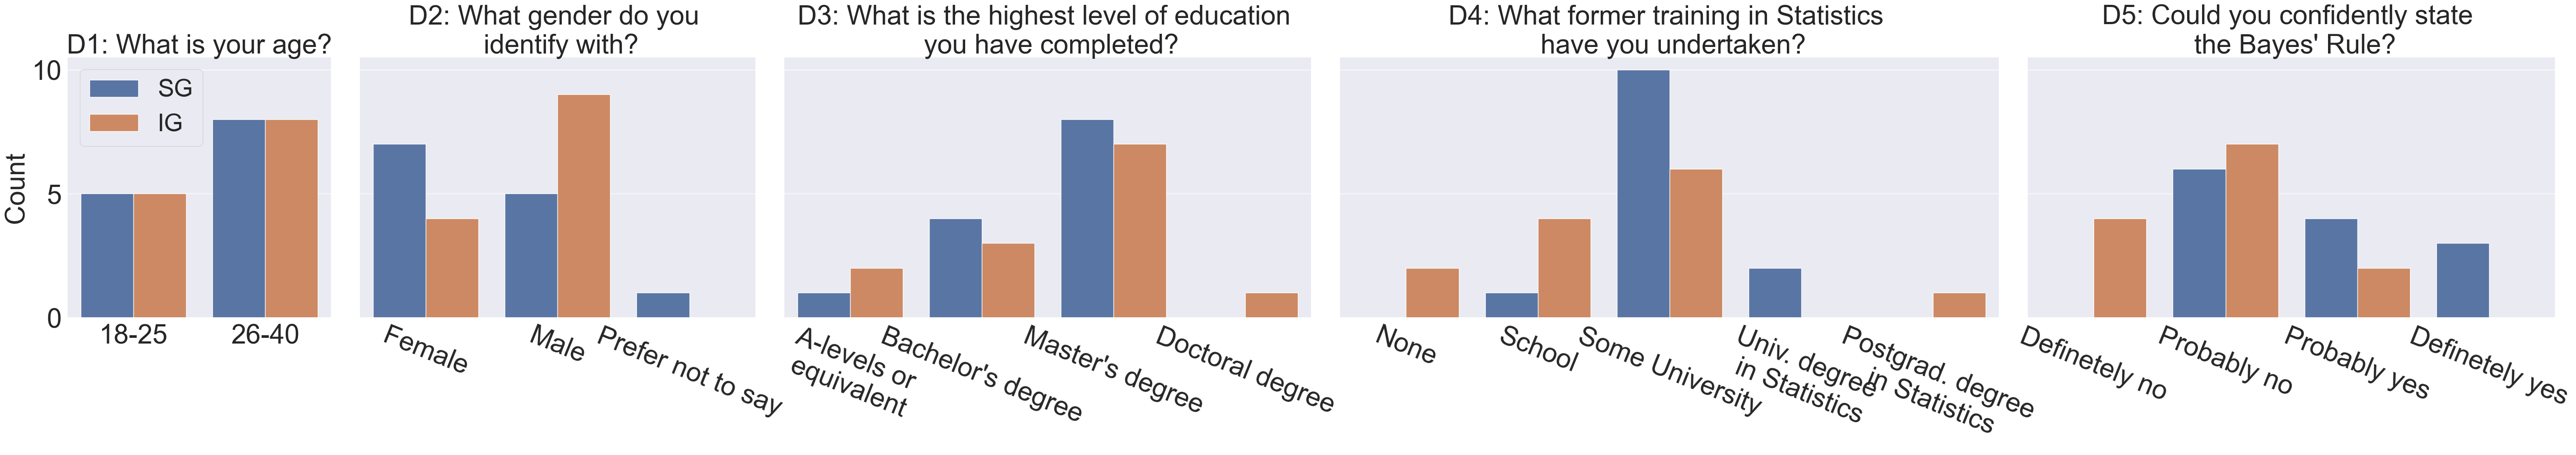

In [19]:
font_size = 44
def tm_sorter(column):
    """Sort function"""
    sorter = ['18-25','26-40', 'Female', 'Male', 'Prefer not to say','A-levels or\n equivalent',"Bachelor's degree",
                       "Master's degree","Doctoral degree",'None','School','Some University','Univ. degree\n in Statistics',
                       'Postgrad. degree\n in Statistics', 'Definetely no','Probably no','Probably yes','Definetely yes']
    correspondence = {s: order for order, s in enumerate(sorter)}
    return column.map(correspondence)

df = df.sort_values(by='answer', key=tm_sorter)
plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': font_size})
ratios = df.groupby('question')['answer'].nunique().values
g = sns.catplot(
    data=df, kind="count",
    x="answer", hue="condition",col="question", 
    height=8.27, aspect=11.7/8.27, legend_out = False, 
    sharex=False,facet_kws={'gridspec_kws':{'width_ratios': ratios}})

g.despine(left=True)
g.set_axis_labels("", "Count")
g.legend.set_title("")
g.set_titles("{col_name}")
for i,ax in enumerate(g.axes[0]):
    ax.tick_params(axis='both', labelsize=font_size)
    ax.yaxis.label.set_size(font_size)
    ax.title.set_size(font_size)
    if i==0:
        ax.legend(loc=2, prop={'size': font_size-4})
    if i>0 and i<5:
        for label in ax.get_xticklabels():
            label.set_rotation(-22)
# fig = g.get_figure()
# fig.savefig('Figure4.svg',dpi=300) 
g.savefig("Figure4.svg",dpi=300)